In [ ]:
pip install diffusers transformers accelerate torch torchvision


In [ ]:
from diffusers import StableDiffusionPipeline
import torch


In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe.to("cpu")  # Use GPU for faster generation


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
from google.colab import files

uploaded = files.upload()  # Cake Dataset


Saving full_cake_dataset.csv to full_cake_dataset (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("full_cake_dataset.csv")
df.head()  # Display the first few rows


,Shape,Flour Type,Weight,Function Type,Ingredients,Icing Type,Filling,Dietary Preference,Color Theme,Toppings,Cake Layers,Texture,Sweetness Level,Decorations,Serving Size,Price Range,Allergens,Shelf Life
0,Oval,Carrot,2kg,Corporate,"Fruits, Cream Cheese, Fondant",Whipped Cream,Raspberry Mousse,Vegan,Silver,Nuts,Multi-Tier,Moist,Low,Edible Glitter,Medium,Premium,"None, Dairy",3 Days
1,Dome,Marble,1kg,Festival,"Fondant, Mousse, Nuts",Cream Cheese Frosting,Vanilla Custard,Gluten-Free,Dark,"Marshmallows, Nuts",Multi-Tier,Fluffy,High,"Fondant Figures, Gold Leaf, Candied Fruits",Small,Budget,"None, Gluten",1 Week
2,Oval,Chocolate,2kg,Birthday,"Ganache, Fruits",Buttercream,Nutella,Low-Carb,Silver,"Marshmallows, Chocolate Chips",Single,Dense,Extra Sweet,"Fondant Figures, Piping Art, Edible Glitter",Party Size,Standard,"Gluten, Soy",1 Day
3,Dome,Pistachio,1.5kg,Festival,"Nuts, Cream Cheese",Fondant,Strawberry Jam,Eggless,Rainbow,"Fruits, Caramel Drizzle, Marshmallows",Multi-Tier,Fluffy,High,"Edible Glitter, Piping Art",Medium,Budget,"Soy, Nuts",Custom
4,Oval,Carrot,3kg,Corporate,"Ganache, Nuts, Mousse, Chocolate",Ganache,Nutella,Low-Carb,Silver,"Caramel Drizzle, Nuts, Chocolate Chips",Double,Soft,Extra Sweet,"Fondant Figures, Edible Glitter",Large,Standard,Dairy,1 Day


In [ ]:
import random

def generate_prompt_from_dataset():
    random_index = random.randint(0, len(df) - 1)
    cake = df.iloc[random_index]

    # Build the text prompt
    prompt = f"A {cake['Shape']} cake with {cake['Flour Type']} flour, covered in {cake['Icing Type']} icing, filled with {cake['Filling']}."
    prompt += f" It has a {cake['Texture']} texture and {cake['Sweetness Level']} sweetness."
    prompt += f" The cake is decorated with {cake['Decorations']} and topped with {cake['Toppings']}."
    prompt += f" It follows a {cake['Dietary Preference']} diet and has a {cake['Color Theme']} color theme."
    prompt += f" This cake is suitable for {cake['Function Type']} and weighs {cake['Weight']}."

    return prompt

# Generate and print a sample prompt
cake_prompt = generate_prompt_from_dataset()
print("Generated Cake Prompt:\n", cake_prompt)


Generated Cake Prompt:
 A Round cake with Carrot flour, covered in Buttercream icing, filled with Fruit Compote. It has a Fluffy texture and Low sweetness. The cake is decorated with Piping Art and topped with Fruits. It follows a Gluten-Free diet and has a Silver color theme. This cake is suitable for Festival and weighs 5kg.


In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Load Stable Diffusion Model
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe.to("cpu")  # Use GPU (or replace with 'cpu' for slower performance)

# Generate Cake Image
image = pipe(cake_prompt).images[0]
image.show()  # Show the image
image.save("generated_cake.png")  # Save the generated cake image


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

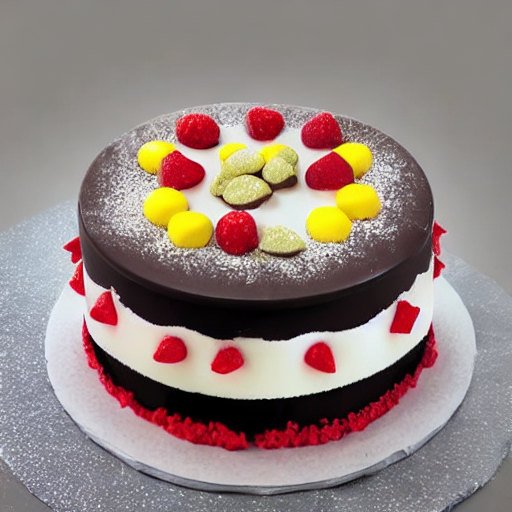

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display
from PIL import Image

image = Image.open("generated_cake.png")
display(image)  # Show image in Colab

# Download Image
from google.colab import files
files.download("generated_cake.png")


In [ ]:
import pandas as pd
import random

# Load dataset
df = pd.read_csv("full_cake_dataset.csv")

# Select a random cake
cake = df.sample(1).iloc[0]

# Improve prompt with more details
prompt = f"A beautifully decorated {cake['Shape']} cake made with rich {cake['Flour Type']} flour."
prompt += f" It is covered in a smooth layer of {cake['Icing Type']} icing, with a delicious {cake['Filling']} filling inside."
prompt += f" The cake has a {cake['Texture']} texture and a {cake['Sweetness Level']} sweetness level."
prompt += f" It is adorned with {cake['Toppings']} and elegantly decorated with {cake['Decorations']}."
prompt += f" The cake follows a {cake['Dietary Preference']} diet and features a stunning {cake['Color Theme']} color theme."
prompt += f" Perfect for {cake['Function Type']} celebrations, this {cake['Cake Layers']} masterpiece is a visual and culinary delight."
prompt += f" High-resolution, realistic food photography, soft lighting, studio background."

print("Enhanced Prompt:\n", prompt)


Enhanced Prompt:
 A beautifully decorated Tiered cake made with rich Pistachio flour. It is covered in a smooth layer of Fondant icing, with a delicious Chocolate filling inside. The cake has a Crispy texture and a Medium sweetness level. It is adorned with Chocolate Chips and elegantly decorated with Edible Glitter, Candied Fruits, Fondant Figures. The cake follows a Keto-Friendly diet and features a stunning Bright color theme. Perfect for Wedding celebrations, this Multi-Tier masterpiece is a visual and culinary delight. High-resolution, realistic food photography, soft lighting, studio background.


In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Load Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe.to("cpu")  # Use GPU if available

# Generate Cake Image with Enhanced Prompt
image = pipe(prompt).images[0]
image.show()
image.save("enhanced_cake.png")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (114 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['and features a stunning gold color theme . perfect for engagement celebrations , this double masterpiece is a visual and culinary delight . high - resolution , realistic food photography , soft lighting , studio background .']


  0%|          | 0/50 [00:00<?, ?it/s]

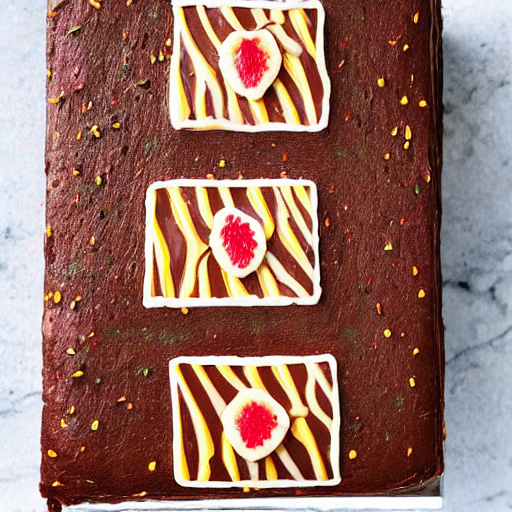

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display
from PIL import Image

image = Image.open("enhanced_cake.png")
display(image)  # Show image in Colab

# Download Image
from google.colab import files
files.download("enhanced_cake.png")

In [ ]:
from diffusers import StableDiffusionPipeline

model_name = "runwayml/stable-diffusion-v1-5"
pipeline = StableDiffusionPipeline.from_pretrained(model_name)

pipeline.save_pretrained("./stable_diffusion_model")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
!zip -r stable_diffusion_model.zip stable_diffusion_model


  adding: stable_diffusion_model/ (stored 0%)
  adding: stable_diffusion_model/tokenizer/ (stored 0%)
  adding: stable_diffusion_model/tokenizer/merges.txt (deflated 60%)
  adding: stable_diffusion_model/tokenizer/special_tokens_map.json (deflated 73%)
  adding: stable_diffusion_model/tokenizer/tokenizer_config.json (deflated 63%)
  adding: stable_diffusion_model/tokenizer/vocab.json (deflated 71%)
  adding: stable_diffusion_model/vae/ (stored 0%)
  adding: stable_diffusion_model/vae/config.json (deflated 55%)
  adding: stable_diffusion_model/vae/diffusion_pytorch_model.safetensors (deflated 7%)
  adding: stable_diffusion_model/unet/ (stored 0%)
  adding: stable_diffusion_model/unet/config.json (deflated 63%)
  adding: stable_diffusion_model/unet/diffusion_pytorch_model.safetensors (deflated 7%)
  adding: stable_diffusion_model/safety_checker/ (stored 0%)
  adding: stable_diffusion_model/safety_checker/config.json (deflated 49%)
  adding: stable_diffusion_model/safety_checker/model.saf

In [ ]:
from google.colab import files
files.download("stable_diffusion_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls -lh


total 4.3G
-rw-r--r-- 1 root root 214K Feb 17 04:28 full_cake_dataset.csv
drwxr-xr-x 1 root root 4.0K Feb 13 14:19 sample_data
drwxr-xr-x 9 root root 4.0K Feb 17 04:29 stable_diffusion_model
-rw-r--r-- 1 root root 4.3G Feb 17 04:41 stable_diffusion_model.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!mv stable_diffusion_model.zip /content/drive/MyDrive/


mv: cannot stat 'stable_diffusion_model.zip': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install flask flask-cors diffusers transformers torch torchvision accelerate pyngrok


In [ ]:
import torch
from flask import Flask, request, jsonify
from flask_cors import CORS
from diffusers import StableDiffusionPipeline
from PIL import Image
import io
import base64
from pyngrok import ngrok

In [ ]:
!unzip /content/drive/MyDrive/stable_diffusion_model.zip -d /content/stable_diffusion_model


Archive:  /content/drive/MyDrive/stable_diffusion_model.zip
   creating: /content/stable_diffusion_model/stable_diffusion_model/
   creating: /content/stable_diffusion_model/stable_diffusion_model/tokenizer/
  inflating: /content/stable_diffusion_model/stable_diffusion_model/tokenizer/merges.txt  
  inflating: /content/stable_diffusion_model/stable_diffusion_model/tokenizer/special_tokens_map.json  
  inflating: /content/stable_diffusion_model/stable_diffusion_model/tokenizer/tokenizer_config.json  
  inflating: /content/stable_diffusion_model/stable_diffusion_model/tokenizer/vocab.json  
   creating: /content/stable_diffusion_model/stable_diffusion_model/vae/
  inflating: /content/stable_diffusion_model/stable_diffusion_model/vae/config.json  
  inflating: /content/stable_diffusion_model/stable_diffusion_model/vae/diffusion_pytorch_model.safetensors  
   creating: /content/stable_diffusion_model/stable_diffusion_model/unet/
  inflating: /content/stable_diffusion_model/stable_diffusion

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_path = "/content/stable_diffusion_model"  # Use the unzipped folder
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float32)
pipe.to("cuda" if torch.cuda.is_available() else "cpu")



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "/content/stable_diffusion_model",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
prompt = "A chocolate cake with strawberries and cream"
image = pipe(prompt).images[0]
image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

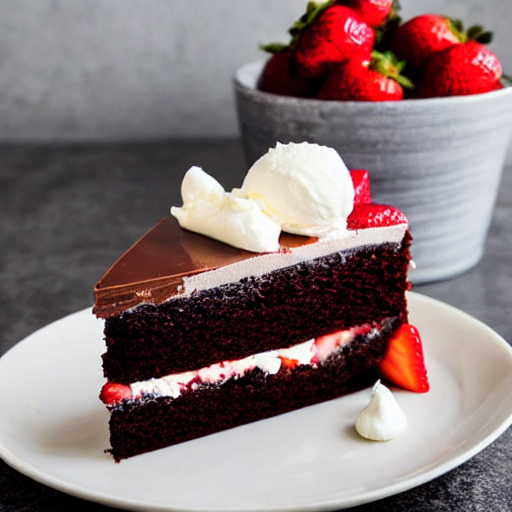

In [ ]:
display(image)

In [ ]:
!zip -r /content/stable_diffusion_model_unzipped.zip /content/stable_diffusion_model


updating: content/stable_diffusion_model/ (stored 0%)
updating: content/stable_diffusion_model/tokenizer/ (stored 0%)
updating: content/stable_diffusion_model/tokenizer/merges.txt (deflated 60%)
updating: content/stable_diffusion_model/tokenizer/special_tokens_map.json (deflated 73%)
updating: content/stable_diffusion_model/tokenizer/tokenizer_config.json (deflated 63%)
updating: content/stable_diffusion_model/tokenizer/vocab.json (deflated 71%)
updating: content/stable_diffusion_model/stable_diffusion_model/ (stored 0%)
updating: content/stable_diffusion_model/stable_diffusion_model/tokenizer/ (stored 0%)
updating: content/stable_diffusion_model/stable_diffusion_model/tokenizer/merges.txt (deflated 60%)
updating: content/stable_diffusion_model/stable_diffusion_model/tokenizer/special_tokens_map.json (deflated 73%)
updating: content/stable_diffusion_model/stable_diffusion_model/tokenizer/tokenizer_config.json (deflated 63%)
updating: content/stable_diffusion_model/stable_diffusion_mode